KPI calc

In [1]:
from pathlib import Path
import os

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import preprocessing
%matplotlib inline

load CSV tag file

In [17]:
filepath = Path(R"C:\Users\fmazl\Documents\ibm\volve\test\others\output\testfilewithlabelandmodel.csv")

df = pd.read_csv(filepath)
df.head()

,TIME - s,DMEA - m,DBTM - m,ROP5 -,BPOS - m,HKLD - kkgf,SWOB - kkgf,TFLO - L/min,SPPA - kPa,RPM - rpm,OBDA,Slips,Pump Status,TDS Status,Pipe Direction,state,state_class,state_class_dectree
0,2007-12-17 05:10:35.040000+00:00,917.789978,909.799988,0.0,9.01,62.080324,0.0,0.0,197.000005,0.0,0,1,0,0,1,1001,in slips,in slips
1,2007-12-17 05:10:39.014000+00:00,917.789978,909.799988,0.0,9.01,62.059929,0.0,0.0,195.000008,0.0,0,1,0,0,1,1001,in slips,in slips
2,2007-12-17 05:10:44.026000+00:00,917.789978,909.799988,0.0,9.01,62.141505,0.0,0.0,205.999993,0.0,0,1,0,0,1,1001,in slips,in slips
3,2007-12-17 05:10:48+00:00,917.789978,909.799988,0.0,9.01,62.263873,0.0,0.0,187.000000,0.0,0,1,0,0,1,1001,in slips,in slips
4,2007-12-17 05:10:53.011000+00:00,917.789978,909.799988,0.0,9.01,62.294464,0.0,0.0,185.999999,0.0,0,1,0,0,1,1001,in slips,in slips


In [18]:
#temporary change dtype
df['TIME - s'] = pd.to_datetime(df['TIME - s'], dayfirst=True)
df.iloc[:,1:9] = df.iloc[:,1:9].astype(float, errors='raise')
df.dtypes

TIME - s               datetime64[ns, UTC]
DMEA - m                           float64
DBTM - m                           float64
ROP5 -                             float64
BPOS - m                           float64
HKLD - kkgf                        float64
SWOB - kkgf                        float64
TFLO - L/min                       float64
SPPA - kPa                         float64
RPM - rpm                          float64
OBDA                                 int64
Slips                                int64
Pump Status                          int64
TDS Status                           int64
Pipe Direction                       int64
state                                int64
state_class                         object
state_class_dectree                 object
dtype: object

Set summary page info  

In [15]:
#Declare Variables
Operator : "Equinor"
Rig : "ABC"
Field : "Volve"
Well : "F15-b"
Section : "17.5 in"

In [19]:

#df["Timestep - s"] = df["TIME - s"].diff()
new_col = df["TIME - s"].diff()
df.insert(1, 'Timestep - s', new_col)
df["Timestep - s"] = df["Timestep - s"] .astype("timedelta64[s]")
df.head()



,TIME - s,Timestep - s,DMEA - m,DBTM - m,ROP5 -,BPOS - m,HKLD - kkgf,SWOB - kkgf,TFLO - L/min,SPPA - kPa,RPM - rpm,OBDA,Slips,Pump Status,TDS Status,Pipe Direction,state,state_class,state_class_dectree
0,2007-12-17 05:10:35.040000+00:00,NaN,917.789978,909.799988,0.0,9.01,62.080324,0.0,0.0,197.000005,0.0,0,1,0,0,1,1001,in slips,in slips
1,2007-12-17 05:10:39.014000+00:00,3.0,917.789978,909.799988,0.0,9.01,62.059929,0.0,0.0,195.000008,0.0,0,1,0,0,1,1001,in slips,in slips
2,2007-12-17 05:10:44.026000+00:00,5.0,917.789978,909.799988,0.0,9.01,62.141505,0.0,0.0,205.999993,0.0,0,1,0,0,1,1001,in slips,in slips
3,2007-12-17 05:10:48+00:00,3.0,917.789978,909.799988,0.0,9.01,62.263873,0.0,0.0,187.000000,0.0,0,1,0,0,1,1001,in slips,in slips
4,2007-12-17 05:10:53.011000+00:00,5.0,917.789978,909.799988,0.0,9.01,62.294464,0.0,0.0,185.999999,0.0,0,1,0,0,1,1001,in slips,in slips


In [20]:
cols = list(df.columns.values)
print (cols)

['TIME - s', 'Timestep - s', 'DMEA - m', 'DBTM - m', 'ROP5 - ', 'BPOS - m', 'HKLD - kkgf', 'SWOB - kkgf', 'TFLO - L/min', 'SPPA - kPa', 'RPM - rpm', 'OBDA', 'Slips', 'Pump Status', 'TDS Status', 'Pipe Direction', 'state', 'state_class', 'state_class_dectree']


In [8]:
#rearrange df columns - no need
#df=df[['TIME - s', 'Timestep - s', 'DMEA - m', 'DBTM - m', 'ROP5 - ', 'BPOS - m', 'HKLD - kkgf', 'SWOB - kkgf', 'TFLO - L/min', 'SPPA - kPa', 'RPM - rpm', 'state_class','state_class_dectree']]
#df.head()

,TIME - s,Timestep - s,DMEA - m,DBTM - m,ROP5 -,BPOS - m,HKLD - kkgf,SWOB - kkgf,TFLO - L/min,SPPA - kPa,RPM - rpm,state_class
0,2007-12-17 05:10:35.040000+00:00,NaN,917.789978,909.799988,0.0,9.01,62.080324,0.0,0.0,197.000005,0.0,in slips
1,2007-12-17 05:10:39.014000+00:00,3.0,917.789978,909.799988,0.0,9.01,62.059929,0.0,0.0,195.000008,0.0,in slips
2,2007-12-17 05:10:44.026000+00:00,5.0,917.789978,909.799988,0.0,9.01,62.141505,0.0,0.0,205.999993,0.0,in slips
3,2007-12-17 05:10:48+00:00,3.0,917.789978,909.799988,0.0,9.01,62.263873,0.0,0.0,187.000000,0.0,in slips
4,2007-12-17 05:10:53.011000+00:00,5.0,917.789978,909.799988,0.0,9.01,62.294464,0.0,0.0,185.999999,0.0,in slips


In [21]:
table = pd.pivot_table(data=df,index=['state_class','DMEA - m'],aggfunc={'Timestep - s':np.sum})
table

Timestep - s
state_class    DMEA - m                 
Circulate hole 230.080002            2.0
               230.258112            6.0
               233.380005            6.0
               233.789525            6.0
               273.279999            1.0
...                                  ...
in slips       2486.770020         219.0
               2527.570068         283.0
               2568.209961         254.0
               2591.060059      152334.0
               4090.350098       56637.0

[110066 rows x 1 columns]

In [30]:
#table2 = pd.pivot_table(data=df,index=['DMEA - m'],aggfunc={'Timestep - s':np.sum},columns='state_class', fill_value=0)
#table2
#table2 = pd.pivot_table(data=df,values='Timestep - s', index=['DMEA - m'],aggfunc=np.sum,columns='state_class', fill_value=0)
table2 = pd.pivot_table(data=df,values='Timestep - s', index=['DMEA - m'],aggfunc=np.sum,columns=['state_class'], fill_value=0)
table_dectree = pd.pivot_table(data=df,values='Timestep - s', index=['DMEA - m'],aggfunc=np.sum,columns=['state_class_dectree'], fill_value=0)
table2.head()


state_class,Circulate hole,Circulate while rotating,Pull out of hole,Pull out only rotating,Ream downwards,Ream upwards,Rotary Drilling,Rotating only,Run in hole,Run in only rotating,Sliding Drilling,Static,Wash Downwards,Wash Upwards,in slips
DMEA - m,,,,,,,,,,,,,,,
0.000000,0,0,0,0,0,0,0,0,0,0,0,19848,0,0,0
200.000006,0,70,81,4,108,0,0,6,1006,1,0,1736,0,0,13568
200.109430,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
200.170694,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
200.231654,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0


In [29]:
table_dectree.head()

state_class_dectree,Circulate hole,Circulate while rotating,Pull out of hole,Pull out only rotating,Ream downwards,Ream upwards,Rotary Drilling,Rotating only,Run in hole,Run in only rotating,Sliding Drilling,Static,Wash Downwards,Wash Upwards,in slips
DMEA - m,,,,,,,,,,,,,,,
0.000000,0,0,0,0,0,0,0,0,0,0,0,19848,0,0,0
200.000006,0,64,79,4,114,0,0,6,1029,1,0,1715,0,0,13568
200.109430,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
200.170694,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
200.231654,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0


In [11]:
cols = list(table2.columns.values)
print (cols)

['Circulate hole', 'Circulate while rotating', 'Pull out of hole', 'Pull out only rotating', 'Ream downwards', 'Ream upwards', 'Rotary Drilling', 'Rotating only', 'Run in hole', 'Run in only rotating', 'Sliding Drilling', 'Static', 'Wash Downwards', 'Wash Upwards', 'in slips']


In [32]:
#filter table2 to get only connection points
# connections made when slips to slips time above certain threshold

#slip2slip = table2[table2['Timestep - s']['in slips'].between(5,600)]
#slip2slip
#slip2slip = table2[table2['in slips']>10]
slip2slip = table2[table2['in slips'].between(5,600)]
slip2slip_dectree = table_dectree[table_dectree['in slips'].between(5,600)]
slip2slip.head()

state_class,Circulate hole,Circulate while rotating,Pull out of hole,Pull out only rotating,Ream downwards,Ream upwards,Rotary Drilling,Rotating only,Run in hole,Run in only rotating,Sliding Drilling,Static,Wash Downwards,Wash Upwards,in slips
DMEA - m,,,,,,,,,,,,,,,
225.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
233.380005,6,116,106,0,4,3,750,15,187,0,0,2222,4,0,528
233.789525,6,140,126,0,7,6,811,17,232,0,0,2538,6,0,597
313.660004,0,39,0,0,40,97,281,0,0,0,0,12,0,0,149
314.529826,0,41,0,0,52,120,321,0,0,0,0,16,0,0,179


In [33]:
slip2slip_dectree.head()

state_class_dectree,Circulate hole,Circulate while rotating,Pull out of hole,Pull out only rotating,Ream downwards,Ream upwards,Rotary Drilling,Rotating only,Run in hole,Run in only rotating,Sliding Drilling,Static,Wash Downwards,Wash Upwards,in slips
DMEA - m,,,,,,,,,,,,,,,
225.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
233.380005,6,116,106,0,4,3,750,15,184,0,0,2225,4,0,528
233.789525,6,140,125,0,7,6,811,17,230,0,0,2541,6,0,597
313.660004,0,39,0,0,40,97,281,0,0,0,0,12,0,0,149
314.529826,0,42,0,0,49,122,321,0,0,0,0,16,0,0,179


In [34]:
#get slip2slip as list into var slip_depth


slip_depth = list(slip2slip.index.values )
slip_depth_dectree = list(slip2slip_dectree.index.values )
slip_depth

[224.9999999,
 233.380005,
 233.7895248,
 313.6600035,
 314.5298256,
 354.5199892,
 355.0426224,
 394.4599915,
 395.5401792,
 435.8599855,
 436.0779696,
 475.3900147,
 476.710248,
 515.7100219,
 516.2437224,
 556.2399902,
 556.3480872,
 596.2800294,
 596.5405392,
 636.2800294,
 636.617472,
 676.75,
 677.0488872,
 717.0900267,
 717.5363856,
 757.4500124,
 757.975116,
 797.8447848,
 797.9400025,
 838.0975872,
 838.1599731,
 878.3826984,
 878.4000245,
 918.630005,
 918.6726864,
 958.7999877,
 958.929756,
 999.0100099,
 999.2215728,
 1039.492968,
 1040.069946,
 1079.650024,
 1079.796977,
 1119.780029,
 1120.113178,
 1159.890015,
 1160.423587,
 1200.02002,
 1200.79709,
 1241.099976,
 1241.20595,
 1281.25,
 1281.602009,
 1322.019403,
 1322.329956,
 1357.209961,
 1362.435883,
 1362.5,
 1397.060059,
 1402.689941,
 1402.853582,
 1437.869995,
 1478.26001,
 1518.650025,
 1558.98999,
 1599.48999,
 1639.619995,
 1679.959961,
 1720.550049,
 1760.839966,
 1801.050049,
 1841.449951,
 1882.099975,
 192

In [35]:
slip_depth_dectree

[224.9999999,
 233.380005,
 233.7895248,
 313.6600035,
 314.5298256,
 354.5199892,
 355.0426224,
 394.4599915,
 395.5401792,
 435.8599855,
 436.0779696,
 475.3900147,
 476.710248,
 515.7100219,
 516.2437224,
 556.2399902,
 556.3480872,
 596.2800294,
 596.5405392,
 636.2800294,
 636.617472,
 676.75,
 677.0488872,
 717.0900267,
 717.5363856,
 757.4500124,
 757.975116,
 797.8447848,
 797.9400025,
 838.0975872,
 838.1599731,
 878.3826984,
 878.4000245,
 918.630005,
 918.6726864,
 958.7999877,
 958.929756,
 999.0100099,
 999.2215728,
 1039.492968,
 1040.069946,
 1079.650024,
 1079.796977,
 1119.780029,
 1120.113178,
 1159.890015,
 1160.423587,
 1200.02002,
 1200.79709,
 1241.099976,
 1241.20595,
 1281.25,
 1281.602009,
 1322.019403,
 1322.329956,
 1357.209961,
 1362.435883,
 1362.5,
 1397.060059,
 1402.689941,
 1402.853582,
 1437.869995,
 1478.26001,
 1518.650025,
 1558.98999,
 1599.48999,
 1639.619995,
 1679.959961,
 1720.550049,
 1760.839966,
 1801.050049,
 1841.449951,
 1882.099975,
 192

In [36]:
#get index pos of slip connections in main table
slip_depth_index = table2.index.get_indexer(slip_depth)
slip_depth_index = list(slip_depth_index)
slip_depth_index

slip_depth_index_dectree=table_dectree.index.get_indexer(slip_depth_dectree)
slip_depth_index_dectree = list(slip_depth_index_dectree)

In [37]:
slip_depth_index_dectree

[1887,
 2849,
 2897,
 9080,
 9122,
 10627,
 10661,
 12017,
 12076,
 13381,
 13392,
 14578,
 14649,
 15898,
 15925,
 17339,
 17344,
 18621,
 18633,
 20184,
 20215,
 22120,
 22143,
 23740,
 23793,
 25851,
 25917,
 27406,
 27410,
 29410,
 29415,
 31150,
 31153,
 32784,
 32786,
 33530,
 33537,
 34328,
 34336,
 35220,
 35239,
 36063,
 36070,
 38239,
 38271,
 40879,
 40906,
 42839,
 42940,
 44524,
 44529,
 46025,
 46057,
 47353,
 47381,
 49241,
 49687,
 49696,
 53636,
 54192,
 54207,
 56827,
 58639,
 60545,
 62283,
 64157,
 66964,
 68736,
 70354,
 72041,
 74086,
 75736,
 77422,
 79056,
 80704,
 82167,
 83692,
 85273,
 86873,
 88487,
 89940,
 92069,
 93690,
 95563,
 97192,
 99125,
 101051,
 102647,
 104773,
 107047]

In [38]:
#test cell for sum

#test_sum = table2.iloc[slip_depth_index,:].sum(axis=0) # working
test_sum = table2.iloc[slip_depth_index[0]:slip_depth_index[0+1],:].sum(axis=0).to_frame()
test_sum


,0
state_class,
Circulate hole,8
Circulate while rotating,2838
Pull out of hole,69
Pull out only rotating,3
Ream downwards,1536
Ream upwards,605
Rotary Drilling,3025
Rotating only,8
Run in hole,1008


In [39]:
#test cell for sum

#test_sum = table2.iloc[slip_depth_index,:].sum(axis=0) # working
test_sum_dectree = table_dectree.iloc[slip_depth_index_dectree[0]:slip_depth_index_dectree[0+1],:].sum(axis=0).to_frame()
test_sum_dectree

,0
state_class_dectree,
Circulate hole,8
Circulate while rotating,2813
Pull out of hole,62
Pull out only rotating,2
Ream downwards,1550
Ream upwards,616
Rotary Drilling,3025
Rotating only,9
Run in hole,1005


In [40]:
#sum table2 according to slip_depth_index in a for loop for each stand info

#drilling stand data drill_full_stand
#drill_full_stand = table2.iloc[slip_depth_index[x]:slip_depth_index[x]+1,:].sum()
#drill_full_stand
length =len(slip_depth_index)
i=0
#drill_full_stand_data =[]
drill_full_stand_data =pd.DataFrame()
while i < length-1:
        #print(i)
        #drill_full_stand_data.append([table2.iloc[slip_depth_index[i]:slip_depth_index[i+1],:].sum().to_frame()])
        drill_full_stand_data = drill_full_stand_data.append([table2.iloc[slip_depth_index[i]:slip_depth_index[i+1],:].sum()])
        i = i+1

#set the slip depth and stand no column, reset index to stand no.
drill_full_stand_data.insert(loc=0, column='Slip Depth', value=slip_depth[1:length])
drill_full_stand_data.insert(loc=0, column='Stand No.', value=list(range(1,length)))
drill_full_stand_data=drill_full_stand_data.set_index(['Stand No.','Slip Depth'],inplace=False)
#drill_full_stand_data.set_index('Stand No.',drop = True)
drill_full_stand_data

,state_class,Circulate hole,Circulate while rotating,Pull out of hole,Pull out only rotating,Ream downwards,Ream upwards,Rotary Drilling,Rotating only,Run in hole,Run in only rotating,Sliding Drilling,Static,Wash Downwards,Wash Upwards,in slips
Stand No.,Slip Depth,,,,,,,,,,,,,,,
1,233.380005,8,2838,69,3,1536,605,3025,8,1008,1,0,1700,0,0,20369
2,233.789525,6,116,106,0,4,3,852,15,187,0,0,2222,4,0,528
3,313.660004,14,1101,2570,0,1448,691,13216,41,1940,21,0,20986,16,0,12097
4,314.529826,0,39,0,0,40,97,354,0,0,0,0,12,0,0,149
5,354.519989,0,78,0,0,52,120,3153,0,0,0,0,16,0,0,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2406.409912,13,117,23,0,42,75,6524,0,56,0,0,3,104,15,229
86,2446.600098,25,208,32,0,119,102,7131,10,80,1,0,57,109,10,219
87,2486.770020,33,130,27,0,308,116,5854,5,59,9,0,43,1168,134,162


In [41]:
# for decision tree
#sum table2 according to slip_depth_index in a for loop for each stand info

#drilling stand data drill_full_stand
#drill_full_stand = table2.iloc[slip_depth_index[x]:slip_depth_index[x]+1,:].sum()
#drill_full_stand
length =len(slip_depth_index_dectree)
i=0
#drill_full_stand_data =[]
drill_full_stand_data_dectree =pd.DataFrame()
while i < length-1:
        #print(i)
        #drill_full_stand_data.append([table2.iloc[slip_depth_index[i]:slip_depth_index[i+1],:].sum().to_frame()])
        drill_full_stand_data_dectree = drill_full_stand_data_dectree.append([table_dectree.iloc[slip_depth_index_dectree[i]:slip_depth_index_dectree[i+1],:].sum()])
        i = i+1

#set the slip depth and stand no column, reset index to stand no.
drill_full_stand_data_dectree.insert(loc=0, column='Slip Depth', value=slip_depth_dectree[1:length])
drill_full_stand_data_dectree.insert(loc=0, column='Stand No.', value=list(range(1,length)))
drill_full_stand_data_dectree=drill_full_stand_data_dectree.set_index(['Stand No.','Slip Depth'],inplace=False)
#drill_full_stand_data.set_index('Stand No.',drop = True)
drill_full_stand_data_dectree

,state_class_dectree,Circulate hole,Circulate while rotating,Pull out of hole,Pull out only rotating,Ream downwards,Ream upwards,Rotary Drilling,Rotating only,Run in hole,Run in only rotating,Sliding Drilling,Static,Wash Downwards,Wash Upwards,in slips
Stand No.,Slip Depth,,,,,,,,,,,,,,,
1,233.380005,8,2813,62,2,1550,616,3025,9,1005,1,0,1710,0,0,20369
2,233.789525,6,116,106,0,4,3,852,15,184,0,0,2225,4,0,528
3,313.660004,14,1092,2591,0,1450,698,13216,40,1946,22,0,20959,16,0,12097
4,314.529826,0,39,0,0,40,97,354,0,0,0,0,12,0,0,149
5,354.519989,0,79,0,0,49,122,3153,0,0,0,0,16,0,0,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2406.409912,13,123,23,0,39,72,6524,0,53,0,0,6,104,15,229
86,2446.600098,25,221,32,0,112,96,7131,11,77,0,0,60,109,10,219
87,2486.770020,34,134,29,0,301,119,5854,8,63,6,0,37,1170,131,162


In [123]:
test = drill_full_stand_data.reset_index()
test2 = drill_full_stand_data_dectree.reset_index()
test['key']='Condition Filter'
test2['key']='Decision Tree'


#test_combined = pd.concat([test,test2],keys=['Condition Filter','Decision Tree'])
test_combined = pd.concat([test,test2])
test_combined = test_combined.sort_values(by=['Stand No.','key'])



#test_combined = pd.concat([test,test2])
#test_combined_group = test_combined.groupby(['key'])
#test_combined = pd.concat([drill_full_stand_data,drill_full_stand_data_dectree])
#test_combined.reset_index()

test_combined


,Stand No.,Slip Depth,Circulate hole,Circulate while rotating,Pull out of hole,Pull out only rotating,Ream downwards,Ream upwards,Rotary Drilling,Rotating only,Run in hole,Run in only rotating,Sliding Drilling,Static,Wash Downwards,Wash Upwards,in slips,key
0,1,233.380005,8,2838,69,3,1536,605,3025,8,1008,1,0,1700,0,0,20369,Condition Filter
0,1,233.380005,8,2813,62,2,1550,616,3025,9,1005,1,0,1710,0,0,20369,Decision Tree
1,2,233.789525,6,116,106,0,4,3,852,15,187,0,0,2222,4,0,528,Condition Filter
1,2,233.789525,6,116,106,0,4,3,852,15,184,0,0,2225,4,0,528,Decision Tree
2,3,313.660004,14,1101,2570,0,1448,691,13216,41,1940,21,0,20986,16,0,12097,Condition Filter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,2486.770020,34,134,29,0,301,119,5854,8,63,6,0,37,1170,131,162,Decision Tree
87,88,2527.570068,4,96,44,0,115,75,8490,0,58,6,10,8,146,19,219,Condition Filter
87,88,2527.570068,7,97,44,0,115,74,8490,0,58,6,7,8,146,19,219,Decision Tree
88,89,2568.209961,53,139,0,0,98,100,9703,0,0,0,0,0,106,52,283,Condition Filter


In [118]:
print(test_combined)

In [65]:
cols = list(drill_full_stand_data.columns.values)
print (cols)

['Stand No.', 'Slip Depth', 'Circulate hole', 'Circulate while rotating', 'Pull out of hole', 'Pull out only rotating', 'Ream downwards', 'Ream upwards', 'Rotary Drilling', 'Rotating only', 'Run in hole', 'Run in only rotating', 'Sliding Drilling', 'Static', 'Wash Downwards', 'Wash Upwards', 'in slips']


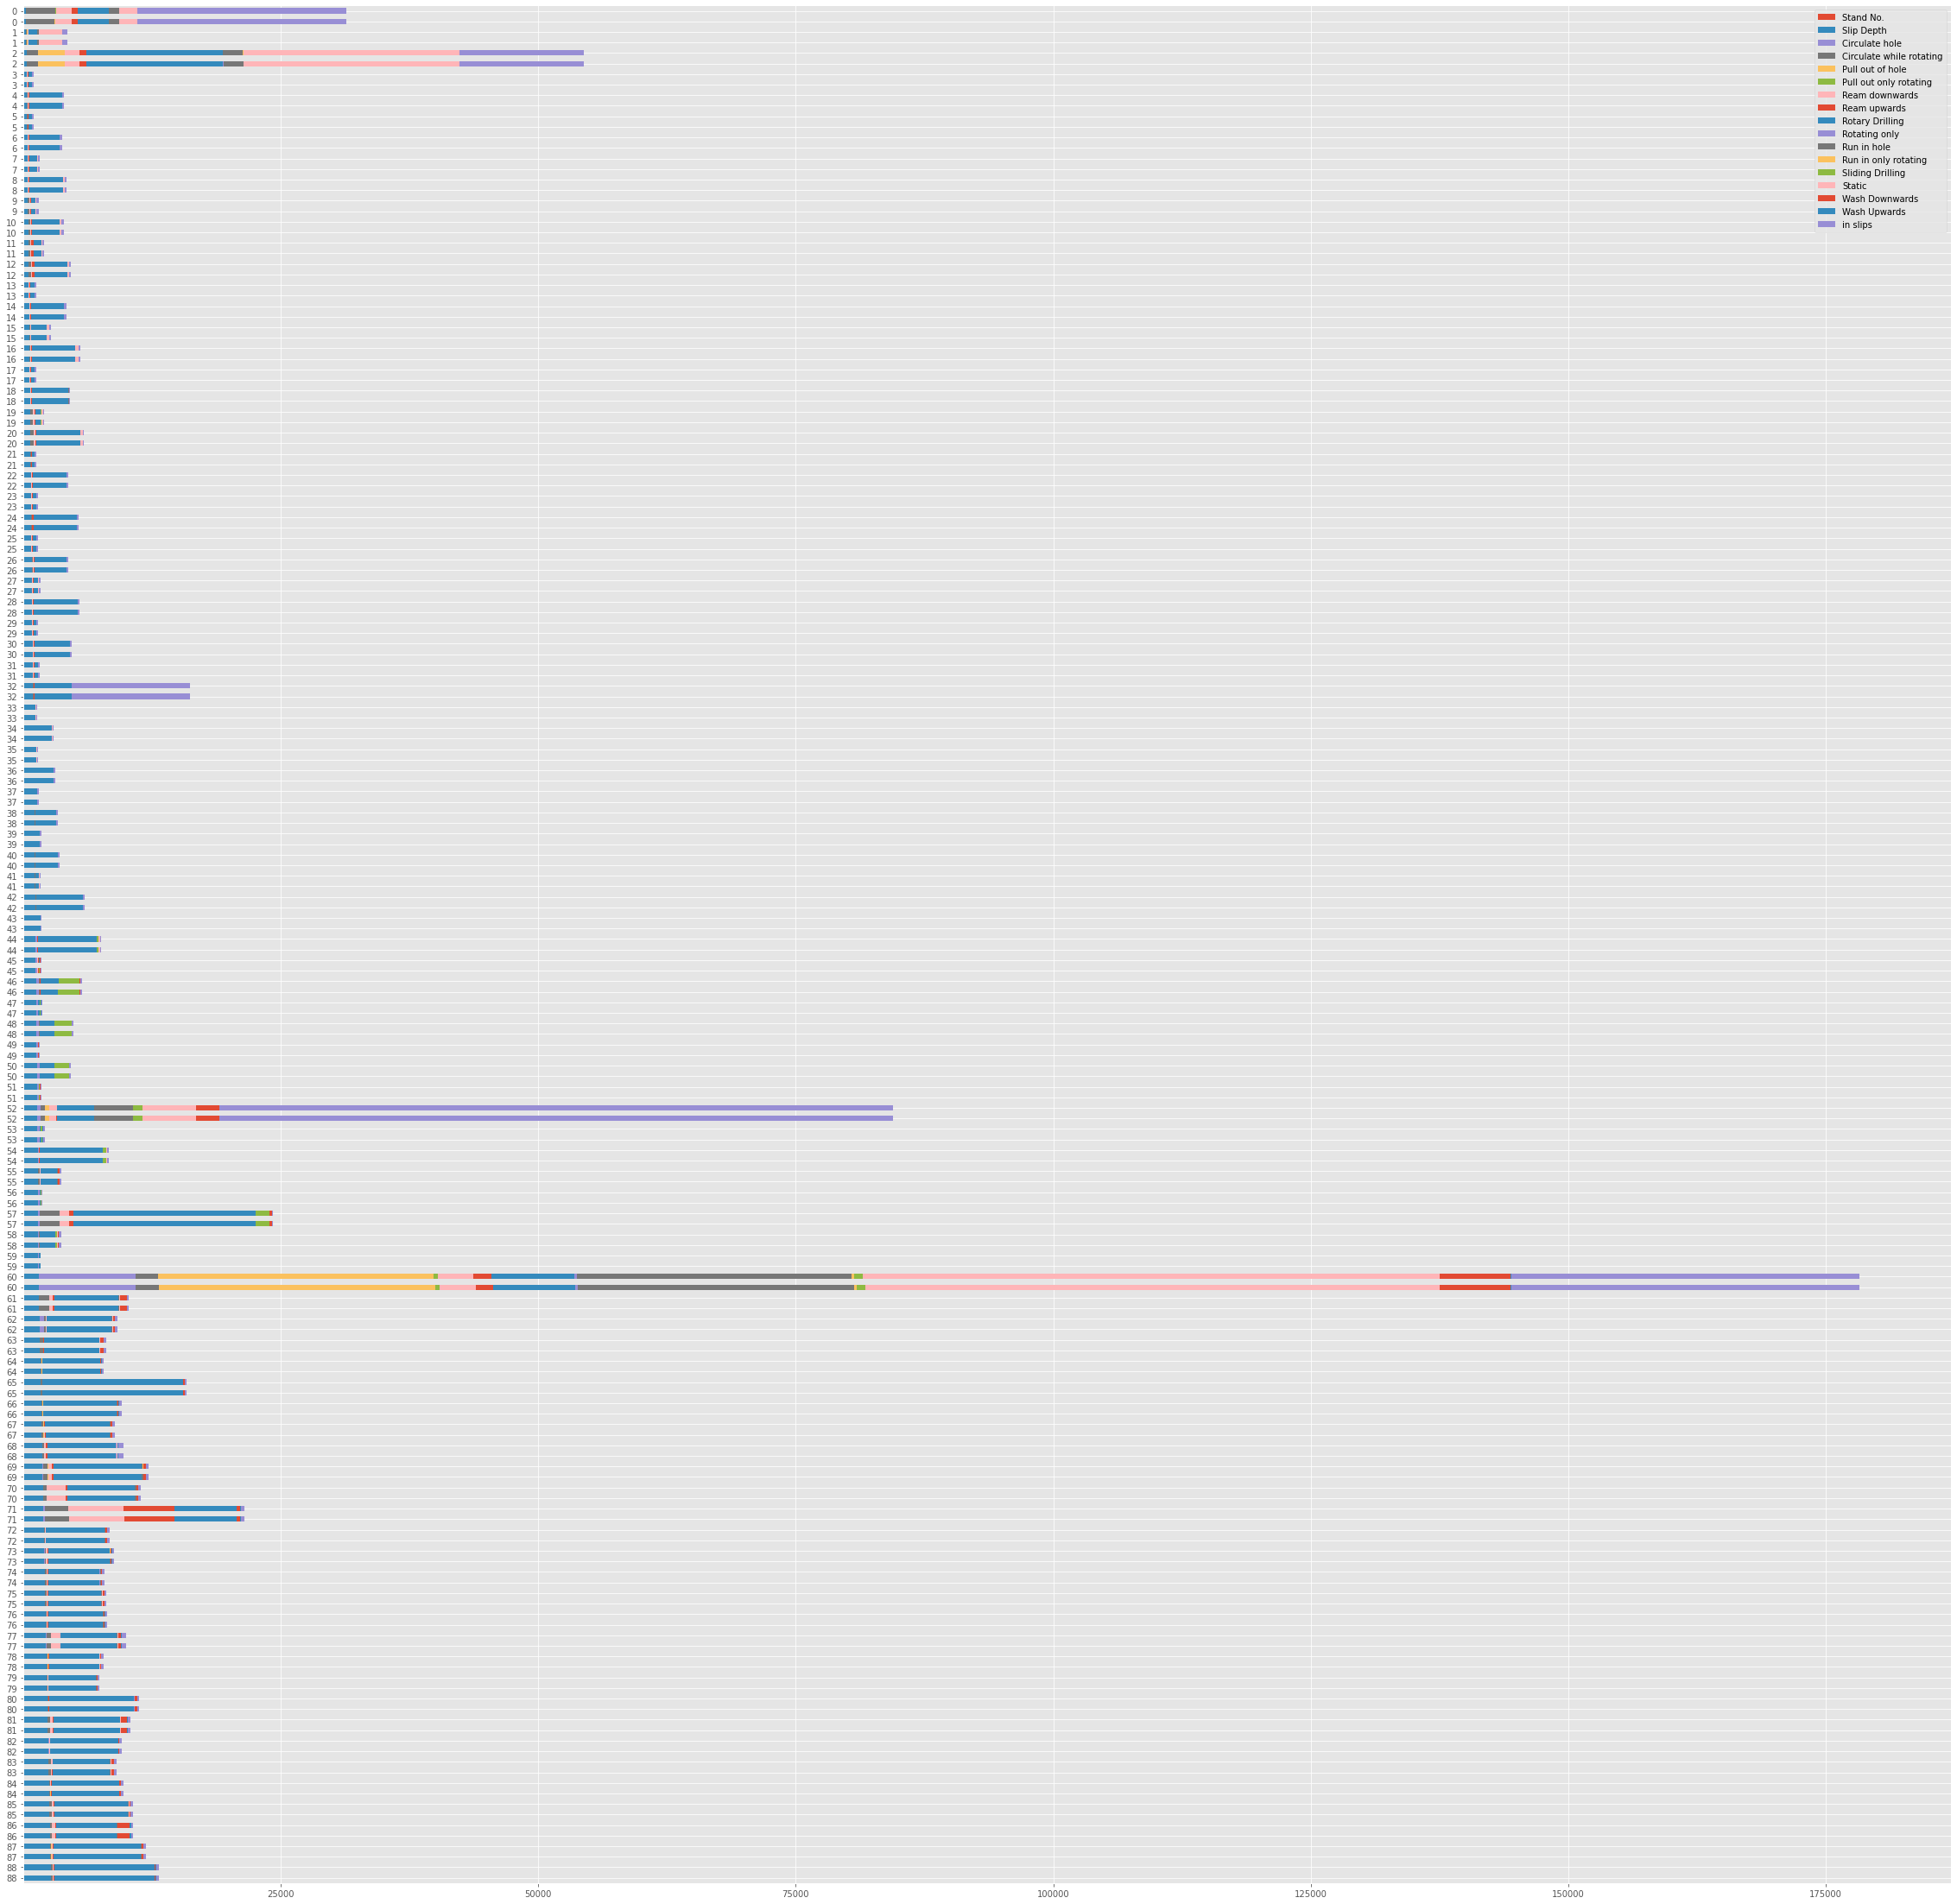

In [125]:
#plot comparison
fig, ax = plt.subplots(figsize=(40, 40))
#test_combinedplot = test_combined.plot(kind='bar',stacked=True,ax=ax)
test_combinedplot = test_combined.plot(kind='barh',stacked=True,ax=ax)
test_combinedplot.invert_yaxis()

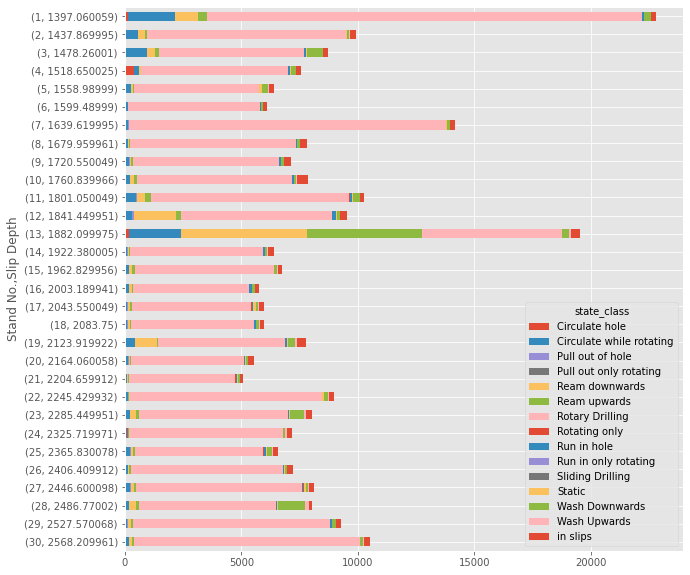

In [29]:

fig, ax = plt.subplots(figsize=(10, 10))
f= drill_full_stand_data.plot(kind='barh',stacked=True,ax=ax)
f.invert_yaxis()



In [35]:
# same data but remove drilling time
Flat_time_stand_data = drill_full_stand_data
Flat_time_stand_data = Flat_time_stand_data.drop(['Sliding Drilling','Rotary Drilling'],axis=1)
#Flat_time_stand_data.drop('Rotary Drilling')
Flat_time_stand_data

,state_class,Circulate hole,Circulate while rotating,Pull out of hole,Pull out only rotating,Ream downwards,Ream upwards,Rotating only,Run in hole,Run in only rotating,Static,Wash Downwards,Wash Upwards,in slips
Stand No.,Slip Depth,,,,,,,,,,,,,
1,1397.060059,116,2032,5,0,1006,386,0,67,0,24,292,16,207
2,1437.869995,0,571,4,0,298,76,0,0,0,66,76,33,282
3,1478.260010,0,952,0,0,346,171,13,64,0,78,671,2,203
4,1518.650025,394,224,4,0,59,0,9,67,0,48,226,0,227
5,1558.989990,0,283,0,0,48,74,0,1,0,121,283,33,216
6,1599.489990,0,136,13,0,0,0,0,46,4,12,81,17,160
7,1639.619995,0,154,4,0,0,12,0,8,0,43,106,19,210
8,1679.959961,0,138,10,0,27,50,0,60,6,8,94,28,296
9,1720.550049,0,170,32,0,60,91,0,75,2,7,116,14,278


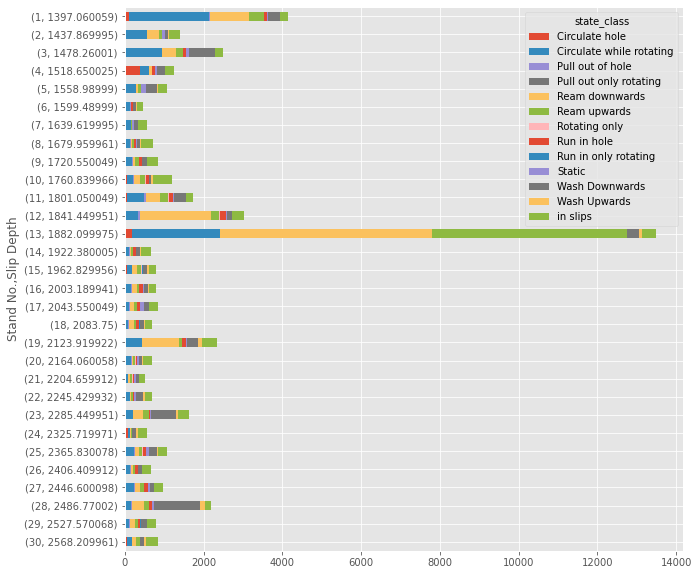

In [38]:
#Flat time graph only


fig, ax = plt.subplots(figsize=(10, 10))
f= Flat_time_stand_data.plot(kind='barh',stacked=True,ax=ax)
f.invert_yaxis()

In [129]:
test_combined

,Stand No.,Slip Depth,Circulate hole,Circulate while rotating,Pull out of hole,Pull out only rotating,Ream downwards,Ream upwards,Rotary Drilling,Rotating only,Run in hole,Run in only rotating,Sliding Drilling,Static,Wash Downwards,Wash Upwards,in slips,key
0,1,233.380005,8,2838,69,3,1536,605,3025,8,1008,1,0,1700,0,0,20369,Condition Filter
0,1,233.380005,8,2813,62,2,1550,616,3025,9,1005,1,0,1710,0,0,20369,Decision Tree
1,2,233.789525,6,116,106,0,4,3,852,15,187,0,0,2222,4,0,528,Condition Filter
1,2,233.789525,6,116,106,0,4,3,852,15,184,0,0,2225,4,0,528,Decision Tree
2,3,313.660004,14,1101,2570,0,1448,691,13216,41,1940,21,0,20986,16,0,12097,Condition Filter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,2486.770020,34,134,29,0,301,119,5854,8,63,6,0,37,1170,131,162,Decision Tree
87,88,2527.570068,4,96,44,0,115,75,8490,0,58,6,10,8,146,19,219,Condition Filter
87,88,2527.570068,7,97,44,0,115,74,8490,0,58,6,7,8,146,19,219,Decision Tree
88,89,2568.209961,53,139,0,0,98,100,9703,0,0,0,0,0,106,52,283,Condition Filter


In [145]:
#get diff between rows
test_combined_diff = test_combined.iloc[:,2:17].diff()
test_combined_diff = test_combined_diff.iloc[1::2,:]
test_combined_diff

,Circulate hole,Circulate while rotating,Pull out of hole,Pull out only rotating,Ream downwards,Ream upwards,Rotary Drilling,Rotating only,Run in hole,Run in only rotating,Sliding Drilling,Static,Wash Downwards,Wash Upwards,in slips
0,0.0,-25.0,-7.0,-1.0,14.0,11.0,0.0,1.0,-3.0,0.0,0.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,3.0,0.0,0.0,0.0
2,0.0,-9.0,21.0,0.0,2.0,7.0,0.0,-1.0,6.0,1.0,0.0,-27.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,-3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,6.0,0.0,0.0,-3.0,-3.0,0.0,0.0,-3.0,0.0,0.0,3.0,0.0,0.0,0.0
85,0.0,13.0,0.0,0.0,-7.0,-6.0,0.0,1.0,-3.0,-1.0,0.0,3.0,0.0,0.0,0.0
86,1.0,4.0,2.0,0.0,-7.0,3.0,0.0,3.0,4.0,-3.0,0.0,-6.0,2.0,-3.0,0.0
87,3.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0


In [146]:
test_combined_diff.sum()

Circulate hole               51.0
Circulate while rotating    174.0
Pull out of hole            141.0
Pull out only rotating       -1.0
Ream downwards               -4.0
Ream upwards               -171.0
Rotary Drilling               1.0
Rotating only                 4.0
Run in hole                 110.0
Run in only rotating         -3.0
Sliding Drilling            -39.0
Static                     -251.0
Wash Downwards                8.0
Wash Upwards                -20.0
in slips                      0.0
dtype: float64